In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
players = pd.read_csv('F:/Data Analysis/Players Big 5/Players.csv')

In [4]:
players

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,G+A-PK_90,xG,npxG,xA,npxG+xA,xG_90,xA_90,xG+xA_90,npxG_90,npxG+xA_90
0,Max Aarons\774cf58b,eng ENG,DF,Norwich City,eng Premier League,22-003,2000.0,18,18,1620,...,0.06,0.6,0.6,0.9,1.4,0.03,0.05,0.08,0.03,0.08
1,Yunis Abdelhamid\32c2d95f,ma MAR,DF,Reims,fr Ligue 1,34-101,1987.0,18,18,1620,...,0.06,1.0,1.0,0.2,1.1,0.05,0.01,0.06,0.05,0.06
2,Salis Abdul Samed\82464ce3,gh GHA,MF,Clermont Foot,fr Ligue 1,21-287,2000.0,17,16,1415,...,0.00,0.4,0.4,0.8,1.2,0.02,0.05,0.07,0.02,0.07
3,Laurent Abergel\31626657,fr FRA,MF,Lorient,fr Ligue 1,28-340,1993.0,18,18,1587,...,0.06,1.6,1.6,1.7,3.2,0.09,0.09,0.18,0.09,0.18
4,Charles Abi\469d3d84,fr FRA,FW,Saint-Étienne,fr Ligue 1,21-270,2000.0,1,1,45,...,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2490,Martín Zubimendi\3ee0dd59,es ESP,MF,Real Sociedad,es La Liga,22-339,1999.0,18,13,1282,...,0.07,0.4,0.4,0.4,0.8,0.03,0.03,0.06,0.03,0.06
2491,Szymon Żurkowski\4e1d5e59,pl POL,MF,Empoli,it Serie A,24-104,1997.0,18,12,929,...,0.39,1.6,1.6,0.7,2.3,0.15,0.07,0.22,0.15,0.22
2492,Martin Ødegaard\79300479,no NOR,MF,Arsenal,eng Premier League,23-021,1998.0,18,14,1219,...,0.59,1.5,1.5,3.3,4.8,0.11,0.24,0.35,0.11,0.35
2493,Milan Đurić\405f6586,ba BIH,FW,Salernitana,it Serie A,31-230,1990.0,16,7,766,...,0.12,2.3,2.3,0.6,2.9,0.27,0.07,0.34,0.27,0.34


In [5]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2495 entries, 0 to 2494
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Player      2495 non-null   object 
 1   Nation      2494 non-null   object 
 2   Pos         2495 non-null   object 
 3   Squad       2495 non-null   object 
 4   Comp        2495 non-null   object 
 5   Age         2494 non-null   object 
 6   Born        2494 non-null   float64
 7   MP          2495 non-null   int64  
 8   Starts      2495 non-null   int64  
 9   Min         2495 non-null   int64  
 10  90s         2495 non-null   float64
 11  Gls         2495 non-null   int64  
 12  Ast         2495 non-null   int64  
 13  G-PK        2495 non-null   int64  
 14  PK          2495 non-null   int64  
 15  PKatt       2495 non-null   int64  
 16  CrdY        2495 non-null   int64  
 17  CrdR        2495 non-null   int64  
 18  Gls_90      2495 non-null   float64
 19  Ast_90      2495 non-null  

### Cleaning our Data

In [6]:
players.columns

Index(['Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP',
       'Starts', 'Min', '90s', 'Gls', 'Ast', 'G-PK', 'PK', 'PKatt', 'CrdY',
       'CrdR', 'Gls_90', 'Ast_90', 'G+A_90', 'G-PK_90', 'G+A-PK_90', 'xG',
       'npxG', 'xA', 'npxG+xA', 'xG_90', 'xA_90', 'xG+xA_90', 'npxG_90',
       'npxG+xA_90'],
      dtype='object')

In [7]:
players['Player'] = players['Player'].str.split('\\',expand=True)[0] #Removing the codes attached to names

In [8]:
players['Age'] = players['Age'].str.split('-',expand=True)[0]  # Cleaning the Age Column by removing the characters after '-' 

In [9]:
players['Comp'] = players['Comp'].str.split(' ',expand=True)[0]

In [10]:
#players.drop(['Born','Age'], axis=1) # Dropping Columns that we dont require 

In [11]:
players

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,G+A-PK_90,xG,npxG,xA,npxG+xA,xG_90,xA_90,xG+xA_90,npxG_90,npxG+xA_90
0,Max Aarons,eng ENG,DF,Norwich City,eng,22,2000.0,18,18,1620,...,0.06,0.6,0.6,0.9,1.4,0.03,0.05,0.08,0.03,0.08
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr,34,1987.0,18,18,1620,...,0.06,1.0,1.0,0.2,1.1,0.05,0.01,0.06,0.05,0.06
2,Salis Abdul Samed,gh GHA,MF,Clermont Foot,fr,21,2000.0,17,16,1415,...,0.00,0.4,0.4,0.8,1.2,0.02,0.05,0.07,0.02,0.07
3,Laurent Abergel,fr FRA,MF,Lorient,fr,28,1993.0,18,18,1587,...,0.06,1.6,1.6,1.7,3.2,0.09,0.09,0.18,0.09,0.18
4,Charles Abi,fr FRA,FW,Saint-Étienne,fr,21,2000.0,1,1,45,...,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2490,Martín Zubimendi,es ESP,MF,Real Sociedad,es,22,1999.0,18,13,1282,...,0.07,0.4,0.4,0.4,0.8,0.03,0.03,0.06,0.03,0.06
2491,Szymon Żurkowski,pl POL,MF,Empoli,it,24,1997.0,18,12,929,...,0.39,1.6,1.6,0.7,2.3,0.15,0.07,0.22,0.15,0.22
2492,Martin Ødegaard,no NOR,MF,Arsenal,eng,23,1998.0,18,14,1219,...,0.59,1.5,1.5,3.3,4.8,0.11,0.24,0.35,0.11,0.35
2493,Milan Đurić,ba BIH,FW,Salernitana,it,31,1990.0,16,7,766,...,0.12,2.3,2.3,0.6,2.9,0.27,0.07,0.34,0.27,0.34


### Defining the Leagues

In [12]:
players['Comp'].unique()

array(['eng', 'fr', 'de', 'it', 'es'], dtype=object)

In [13]:
prem = players[players['Comp'] == 'eng']
laliga = players[players['Comp'] == 'es']
bundesliga = players[players['Comp'] == 'de']
seriea = players[players['Comp'] == 'it']
ligue1 = players[players['Comp'] == 'fr']

### Descriptive Summary Statistics

In [14]:
players.describe()

,Born,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,...,G+A-PK_90,xG,npxG,xA,npxG+xA,xG_90,xA_90,xG+xA_90,npxG_90,npxG+xA_90
count,2494.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.00000,2495.000000,2495.000000,2495.000000,...,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000
mean,1995.065758,11.076553,8.094589,726.792786,8.075431,1.014830,0.70982,0.918637,0.096192,0.116232,...,0.205627,1.002285,0.913587,0.670822,1.586533,0.144421,0.089287,0.233848,0.135683,0.225066
std,4.457907,5.720795,6.097960,515.597307,5.728312,1.913575,1.23435,1.706923,0.477612,0.546290,...,0.468010,1.598540,1.389624,0.920848,2.076889,0.382573,0.217156,0.470904,0.375893,0.464443
min,1981.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1992.000000,6.000000,2.000000,239.000000,2.650000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.200000,0.010000,0.000000,0.040000,0.010000,0.040000
50%,1995.000000,12.000000,8.000000,688.000000,7.600000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.070000,0.400000,0.400000,0.300000,0.900000,0.060000,0.050000,0.130000,0.060000,0.130000
75%,1998.000000,16.000000,13.000000,1163.000000,12.900000,1.000000,1.00000,1.000000,0.000000,0.000000,...,0.280000,1.200000,1.100000,1.000000,2.100000,0.180000,0.120000,0.310000,0.170000,0.310000
max,2005.000000,20.000000,20.000000,1800.000000,20.000000,19.000000,13.00000,16.000000,6.000000,7.000000,...,11.250000,16.700000,14.400000,7.100000,18.200000,13.930000,6.500000,13.930000,13.930000,13.930000


Describing objects

In [45]:
players.describe(include='object')

,Player,Nation,Pos,Squad,Comp,Age
count,2495,2494,2495,2495,2495,2494
unique,2447,101,12,98,5,25
top,Hélder Costa,es ESP,DF,Barcelona,es,24
freq,2,381,811,33,533,220


Decribing integers

In [43]:
players.describe(include='int')

,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR
count,2495.000000,2495.000000,2495.000000,2495.000000,2495.00000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000
mean,11.076553,8.094589,726.792786,1.014830,0.70982,0.918637,0.096192,0.116232,1.569539,0.074148
std,5.720795,6.097960,515.597307,1.913575,1.23435,1.706923,0.477612,0.546290,1.671460,0.271089
min,1.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,2.000000,239.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,8.000000,688.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,16.000000,13.000000,1163.000000,1.000000,1.00000,1.000000,0.000000,0.000000,2.000000,0.000000
max,20.000000,20.000000,1800.000000,19.000000,13.00000,16.000000,6.000000,7.000000,9.000000,2.000000


Describing floats

In [44]:
players.describe(include='float')

,Born,90s,Gls_90,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG,npxG,xA,npxG+xA,xG_90,xA_90,xG+xA_90,npxG_90,npxG+xA_90
count,2494.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000
mean,1995.065758,8.075431,0.118894,0.095880,0.214693,0.109816,0.205627,1.002285,0.913587,0.670822,1.586533,0.144421,0.089287,0.233848,0.135683,0.225066
std,4.457907,5.728312,0.266292,0.379653,0.474717,0.256241,0.468010,1.598540,1.389624,0.920848,2.076889,0.382573,0.217156,0.470904,0.375893,0.464443
min,1981.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1992.000000,2.650000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.010000,0.000000,0.040000,0.010000,0.040000
50%,1995.000000,7.600000,0.000000,0.000000,0.080000,0.000000,0.070000,0.400000,0.400000,0.300000,0.900000,0.060000,0.050000,0.130000,0.060000,0.130000
75%,1998.000000,12.900000,0.150000,0.120000,0.300000,0.140000,0.280000,1.200000,1.100000,1.000000,2.100000,0.180000,0.120000,0.310000,0.170000,0.310000
max,2005.000000,20.000000,5.000000,11.250000,11.250000,5.000000,11.250000,16.700000,14.400000,7.100000,18.200000,13.930000,6.500000,13.930000,13.930000,13.930000


In [15]:
prem.describe()

,Born,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,...,G+A-PK_90,xG,npxG,xA,npxG+xA,xG_90,xA_90,xG+xA_90,npxG_90,npxG+xA_90
count,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,...,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000
mean,1994.844398,10.929461,8.717842,783.068465,8.702697,1.097510,0.786307,1.000000,0.097510,0.116183,...,0.222863,1.107261,1.018050,0.748548,1.769295,0.142137,0.094564,0.237054,0.131452,0.226307
std,4.204079,5.850814,6.262389,539.608819,5.995183,1.930399,1.287223,1.757668,0.461438,0.506699,...,0.604934,1.687021,1.521757,0.996651,2.302681,0.217685,0.308304,0.390906,0.199474,0.380782
min,1981.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1992.000000,6.000000,3.000000,288.500000,3.200000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.100000,0.100000,0.000000,0.200000,0.010000,0.000000,0.040000,0.010000,0.040000
50%,1995.000000,12.000000,8.000000,751.500000,8.350000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.090000,0.500000,0.450000,0.400000,0.900000,0.070000,0.050000,0.130000,0.060000,0.130000
75%,1998.000000,16.000000,14.000000,1264.500000,14.075000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.280000,1.300000,1.200000,1.100000,2.300000,0.187500,0.120000,0.330000,0.170000,0.310000
max,2004.000000,20.000000,20.000000,1800.000000,20.000000,16.000000,9.000000,14.000000,6.000000,6.000000,...,11.250000,12.500000,10.600000,7.100000,16.900000,1.570000,6.500000,6.500000,1.570000,6.500000


In [16]:
laliga.describe()

,Born,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,...,G+A-PK_90,xG,npxG,xA,npxG+xA,xG_90,xA_90,xG+xA_90,npxG_90,npxG+xA_90
count,532.000000,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,...,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000
mean,1994.387218,11.121951,7.883677,708.121951,7.866229,0.872420,0.624765,0.784240,0.088180,0.114447,...,0.179400,0.882552,0.795872,0.578987,1.376548,0.131538,0.092026,0.223583,0.123771,0.215722
std,4.536156,5.752912,6.009202,506.767307,5.630404,1.766078,1.057513,1.580061,0.460581,0.527476,...,0.451238,1.372328,1.169033,0.776275,1.752161,0.306856,0.279089,0.523983,0.302559,0.520460
min,1981.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,6.000000,2.000000,238.000000,2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.200000,0.010000,0.000000,0.040000,0.010000,0.040000
50%,1994.000000,12.000000,7.000000,643.000000,7.100000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.070000,0.400000,0.400000,0.300000,0.800000,0.060000,0.040000,0.120000,0.050000,0.120000
75%,1998.000000,16.000000,13.000000,1102.000000,12.200000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.250000,1.100000,1.000000,0.900000,1.900000,0.160000,0.110000,0.280000,0.150000,0.270000
max,2004.000000,20.000000,20.000000,1800.000000,20.000000,15.000000,8.000000,14.000000,5.000000,5.000000,...,9.000000,9.400000,8.600000,4.800000,13.400000,4.700000,4.920000,9.630000,4.700000,9.630000


In [17]:
bundesliga.describe()

,Born,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,...,G+A-PK_90,xG,npxG,xA,npxG+xA,xG_90,xA_90,xG+xA_90,npxG_90,npxG+xA_90
count,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,...,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000
mean,1995.524229,10.343612,7.414097,666.387665,7.404846,1.013216,0.720264,0.942731,0.070485,0.090308,...,0.241938,1.022907,0.953084,0.688106,1.643612,0.162048,0.100022,0.262357,0.152577,0.252907
std,4.193244,5.212143,5.698873,475.900521,5.288154,1.982217,1.388596,1.834494,0.386712,0.438987,...,0.541439,1.700709,1.551337,1.003609,2.261257,0.326640,0.208083,0.397064,0.313787,0.386042
min,1984.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1992.250000,6.000000,2.000000,225.750000,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.100000,0.100000,0.000000,0.200000,0.020000,0.000000,0.050000,0.020000,0.050000
50%,1996.000000,12.000000,7.000000,643.500000,7.150000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.080000,0.400000,0.400000,0.300000,0.900000,0.070000,0.050000,0.150000,0.070000,0.150000
75%,1998.000000,15.000000,13.000000,1080.000000,12.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.317500,1.200000,1.200000,0.900000,2.100000,0.200000,0.130000,0.327500,0.187500,0.320000
max,2005.000000,17.000000,17.000000,1530.000000,17.000000,19.000000,13.000000,16.000000,3.000000,4.000000,...,7.500000,16.700000,14.400000,7.000000,18.200000,3.650000,3.180000,3.650000,3.650000,3.650000


In [18]:
seriea.describe()

,Born,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,...,G+A-PK_90,xG,npxG,xA,npxG+xA,xG_90,xA_90,xG+xA_90,npxG_90,npxG+xA_90
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,...,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,1994.681467,11.654440,8.281853,743.270270,8.256757,1.096525,0.733591,0.980695,0.115830,0.142857,...,0.205405,1.021622,0.912355,0.672394,1.585714,0.131525,0.076834,0.208301,0.122645,0.199324
std,4.533230,5.867187,6.253022,520.722415,5.784812,2.038874,1.197382,1.770053,0.565019,0.688997,...,0.371825,1.618807,1.315685,0.883171,1.962962,0.235790,0.087404,0.269293,0.226298,0.257561
min,1981.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1992.000000,7.000000,2.000000,261.750000,2.925000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.100000,0.010000,0.010000,0.040000,0.010000,0.040000
50%,1995.000000,13.000000,8.000000,713.500000,7.950000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.080000,0.400000,0.400000,0.300000,0.900000,0.060000,0.050000,0.120000,0.060000,0.120000
75%,1998.000000,17.000000,14.000000,1183.500000,13.175000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.290000,1.200000,1.200000,1.000000,2.175000,0.170000,0.120000,0.300000,0.160000,0.280000
max,2004.000000,20.000000,20.000000,1800.000000,20.000000,16.000000,7.000000,12.000000,5.000000,7.000000,...,4.660000,11.200000,9.800000,4.700000,12.400000,2.970000,0.500000,2.970000,2.970000,2.970000


In [19]:
ligue1.describe()

,Born,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,...,G+A-PK_90,xG,npxG,xA,npxG+xA,xG_90,xA_90,xG+xA_90,npxG_90,npxG+xA_90
count,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,...,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000
mean,1995.968504,11.234252,8.141732,730.169291,8.114173,1.003937,0.692913,0.897638,0.106299,0.114173,...,0.184567,0.990157,0.903937,0.676378,1.583268,0.157500,0.084508,0.242146,0.150394,0.235059
std,4.587844,5.791431,6.169499,525.538322,5.838024,1.849352,1.245184,1.596765,0.487031,0.524316,...,0.333280,1.615782,1.387868,0.941438,2.094686,0.650687,0.115181,0.664342,0.648258,0.661009
min,1983.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1993.000000,6.000000,2.000000,219.500000,2.400000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.100000,0.010000,0.000000,0.037500,0.010000,0.037500
50%,1997.000000,13.000000,8.000000,701.500000,7.800000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.060000,0.400000,0.400000,0.300000,0.850000,0.055000,0.040000,0.120000,0.050000,0.120000
75%,2000.000000,16.250000,14.000000,1170.750000,13.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.290000,1.100000,1.100000,1.000000,2.100000,0.170000,0.120000,0.340000,0.170000,0.330000
max,2005.000000,19.000000,19.000000,1710.000000,19.000000,12.000000,9.000000,10.000000,5.000000,5.000000,...,4.090000,11.200000,9.700000,6.700000,14.500000,13.930000,1.120000,13.930000,13.930000,13.930000


### Crosstab

In [53]:
pd.crosstab(prem['Age'], prem['Pos'])

Pos,DF,DFFW,DFMF,FW,FWDF,FWMF,GK,MF,MFDF,MFFW
Age,,,,,,,,,,
18,0,0,0,1,0,1,0,1,0,1
19,5,0,0,4,0,5,0,4,0,0
20,7,0,0,5,0,4,0,3,0,6
21,9,1,0,5,0,4,1,3,0,2
22,13,0,1,2,0,5,0,7,0,4
23,8,0,1,2,0,4,3,10,0,2
24,19,0,0,5,0,10,2,8,0,1
25,11,0,1,9,0,5,1,8,1,9
26,10,0,1,5,0,5,2,10,1,2


In [62]:
pd.crosstab(prem['Age'], prem['Pos']).describe() #Remember Age is the Index

Pos,DF,DFFW,DFMF,FW,FWDF,FWMF,GK,MF,MFDF,MFFW
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,7.363636,0.181818,0.318182,3.090909,0.045455,2.454545,1.636364,4.909091,0.227273,1.681818
std,6.336181,0.394771,0.476731,2.467100,0.213201,2.558409,1.497473,3.702111,0.428932,2.317354
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,0.250000,0.250000,1.250000,0.000000,0.000000
50%,7.500000,0.000000,0.000000,3.000000,0.000000,1.500000,1.500000,5.000000,0.000000,1.000000
75%,11.750000,0.000000,1.000000,5.000000,0.000000,4.000000,2.750000,7.750000,0.000000,2.000000
max,19.000000,1.000000,1.000000,9.000000,1.000000,10.000000,6.000000,11.000000,1.000000,9.000000


### VALUE_COUNTS, SORT_VALUES AND ARITHMETIC OPERATORS

In [20]:
players['Gls'].value_counts() # This helps us to see the distribution of our Goals. One person Scored 19 Goals

0     1512
1      429
2      228
3      103
4       70
5       58
6       30
7       23
8       14
9       11
10       5
11       3
16       3
12       2
15       1
13       1
14       1
19       1
Name: Gls, dtype: int64

In [21]:
scorers_with_10_goals = players[players['Gls'] >= 10] #defining our top 10 scorers

In [22]:
scorers_with_10_goals

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,G+A-PK_90,xG,npxG,xA,npxG+xA,xG_90,xA_90,xG+xA_90,npxG_90,npxG+xA_90
116,Iago Aspas,es ESP,FW,Celta Vigo,es,34,1987.0,18,17,1419,...,0.63,7.7,4.6,3.5,8.1,0.49,0.22,0.71,0.29,0.51
222,Wissam Ben Yedder,fr FRA,FW,Monaco,fr,31,1990.0,19,13,1146,...,0.55,6.8,3.0,2.1,5.1,0.54,0.16,0.70,0.24,0.40
236,Karim Benzema,fr FRA,FW,Real Madrid,es,34,1987.0,19,19,1558,...,1.21,9.4,8.6,4.8,13.4,0.54,0.28,0.82,0.50,0.77
527,Jonathan David,ca CAN,FW,Lille,fr,21,2000.0,19,15,1366,...,0.66,9.6,7.3,2.2,9.5,0.63,0.14,0.78,0.48,0.63
946,Erling Haaland,no NOR,FW,Dortmund,de,21,2000.0,11,10,901,...,1.50,8.6,6.4,2.6,9.0,0.86,0.26,1.12,0.63,0.90
1055,Ciro Immobile,it ITA,FW,Lazio,it,31,1990.0,16,16,1361,...,0.86,11.2,7.4,1.5,9.0,0.74,0.10,0.84,0.49,0.59
1112,Joselu,es ESP,FW,Alavés,es,31,1990.0,19,17,1579,...,0.40,7.2,3.4,2.4,5.8,0.41,0.14,0.55,0.19,0.33
1115,Diogo Jota,pt POR,FW,Liverpool,eng,25,1996.0,19,16,1372,...,0.72,10.6,10.6,3.6,14.1,0.69,0.23,0.93,0.69,0.93
1120,Juanmi,es ESP,FW,Betis,es,28,1993.0,17,13,1057,...,1.02,6.1,6.1,1.0,7.0,0.52,0.08,0.60,0.52,0.60
1125,Vinicius Júnior,br BRA,FWMF,Real Madrid,es,21,2000.0,19,17,1512,...,0.83,6.8,6.8,2.8,9.6,0.40,0.17,0.57,0.40,0.57


In [23]:
scorers_with_10_goals['Comp'].value_counts() # Using value counts to get the distribution of the leagues with players with more than 10 goals

es     5
de     4
it     4
fr     2
eng    2
Name: Comp, dtype: int64

In [24]:
scorers_with_10_goals['Nation'].value_counts() # Finding the distribution of nationalities

es ESP    3
fr FRA    3
ar ARG    2
ca CAN    1
no NOR    1
it ITA    1
pt POR    1
br BRA    1
pl POL    1
eg EGY    1
cz CZE    1
rs SRB    1
Name: Nation, dtype: int64

In [25]:
scorers_with_10_goals.sort_values(by='Gls', ascending=False)

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,G+A-PK_90,xG,npxG,xA,npxG+xA,xG_90,xA_90,xG+xA_90,npxG_90,npxG+xA_90
1297,Robert Lewandowski,pl POL,FW,Bayern Munich,de,33,1988.0,17,17,1448,...,1.06,16.7,14.4,3.8,18.2,1.04,0.24,1.28,0.90,1.13
2393,Dušan Vlahović,rs SRB,FW,Fiorentina,it,21,2000.0,19,19,1695,...,0.69,11.1,7.3,1.8,9.1,0.59,0.10,0.69,0.39,0.48
2073,Patrik Schick,cz CZE,FW,Leverkusen,de,25,1996.0,14,14,1085,...,1.33,10.1,9.4,0.5,9.9,0.84,0.05,0.89,0.78,0.82
2016,Mohamed Salah,eg EGY,FW,Liverpool,eng,29,1992.0,20,20,1782,...,1.16,12.5,10.1,6.8,16.9,0.63,0.34,0.98,0.51,0.85
236,Karim Benzema,fr FRA,FW,Real Madrid,es,34,1987.0,19,19,1558,...,1.21,9.4,8.6,4.8,13.4,0.54,0.28,0.82,0.50,0.77
1055,Ciro Immobile,it ITA,FW,Lazio,it,31,1990.0,16,16,1361,...,0.86,11.2,7.4,1.5,9.0,0.74,0.10,0.84,0.49,0.59
946,Erling Haaland,no NOR,FW,Dortmund,de,21,2000.0,11,10,901,...,1.50,8.6,6.4,2.6,9.0,0.86,0.26,1.12,0.63,0.90
527,Jonathan David,ca CAN,FW,Lille,fr,21,2000.0,19,15,1366,...,0.66,9.6,7.3,2.2,9.5,0.63,0.14,0.78,0.48,0.63
2132,Giovanni Simeone,ar ARG,FW,Hellas Verona,it,26,1995.0,18,15,1306,...,1.03,5.1,5.1,1.0,6.2,0.35,0.07,0.42,0.35,0.42
1449,Lautaro Martínez,ar ARG,FW,Inter,it,24,1997.0,17,13,1067,...,0.84,11.0,7.5,1.9,9.3,0.93,0.16,1.09,0.63,0.79


### Correlation

In [37]:
players['Gls'].corr(players['xG'])

0.8846831478191448

In [41]:
laliga['xG_90'].corr(laliga['xA_90'])

0.5965549970164918

## Exploring distribution

### i. Boxplots

In [65]:
players['Gls'].describe()

count    2495.000000
mean        1.014830
std         1.913575
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        19.000000
Name: Gls, dtype: float64

PLOTTING GOALS  

Text(0, 0.5, 'All Goals Boxplot')

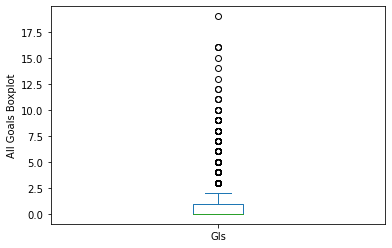

Text(0, 0.5, 'xG Boxplot')

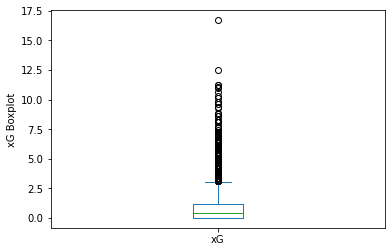

In [68]:
ax = (players['xG']).plot.box()
ax.set_ylabel('xG Boxplot') # The Green line indicates Median

### BOXPLOT FOR THE SCORERS WITH OVER 10 GOALS

GOALS BOXPLOTS

Text(0, 0.5, 'All Goals Boxplot')

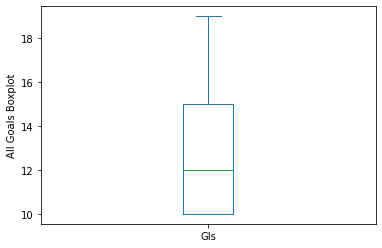

In [82]:
ax = (scorers_with_10_goals['Gls']).plot.box()
ax.set_ylabel('All Goals Boxplot')

XG FOR SCORERS WITH OVER 10 GOALS

Text(0, 0.5, 'xG Boxplot')

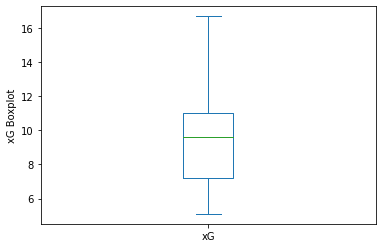

In [83]:
ax = (scorers_with_10_goals['xG']).plot.box()
ax.set_ylabel('xG Boxplot')

### ii. Frequency Tables and Histograms

In [75]:
binnedgoals = pd.cut(players['Gls'],10)
binnedgoals.value_counts()

(-0.019, 1.9]    1941
(1.9, 3.8]        331
(3.8, 5.7]        128
(5.7, 7.6]         53
(7.6, 9.5]         25
(9.5, 11.4]         8
(11.4, 13.3]        3
(15.2, 17.1]        3
(13.3, 15.2]        2
(17.1, 19.0]        1
Name: Gls, dtype: int64

### Histogram

All Players Goals

Text(0.5, 0, 'Player Goals')

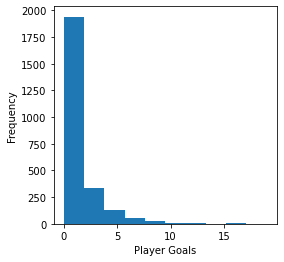

In [78]:
ax = (players['Gls']).plot.hist(figsize=(4, 4))
ax.set_xlabel('Player Goals')

All Players Assists

Text(0.5, 0, 'Player Assists')

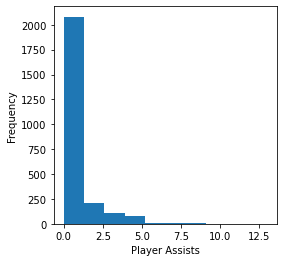

In [79]:
ax = (players['Ast']).plot.hist(figsize=(4, 4))
ax.set_xlabel('Player Assists')

Expected Goals

Text(0.5, 0, 'Player Expected Goals')

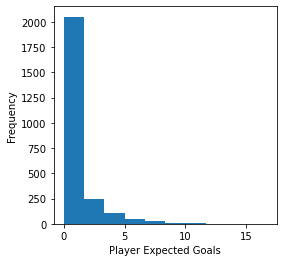

In [80]:
ax = (players['xG']).plot.hist(figsize=(4, 4))
ax.set_xlabel('Player Expected Goals')

#### Histogram for the scorers with over ten goals 

Goals histogram

Text(0.5, 0, 'Distribution of Players with over 10 Goals')

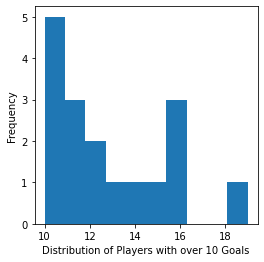

In [85]:
ax = (scorers_with_10_goals['Gls']).plot.hist(figsize=(4, 4))
ax.set_xlabel('Distribution of Players with over 10 Goals')

xG histogram

Text(0.5, 0, 'Distribution of xG for Players with over 10 Goals')

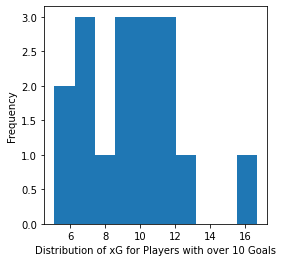

In [86]:
ax = (scorers_with_10_goals['xG']).plot.hist(figsize=(4, 4))
ax.set_xlabel('Distribution of xG for Players with over 10 Goals')

### Density Plots

Goals Density plot

Text(0.5, 0, 'Goals Density')

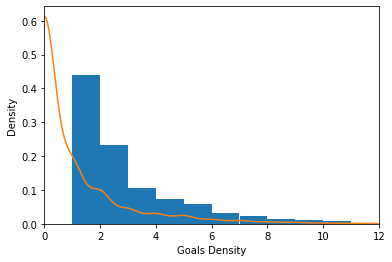

In [81]:
ax = players['Gls'].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
players['Gls'].plot.density(ax=ax)
ax.set_xlabel('Goals Density')

xG Density plot

Text(0.5, 0, 'xG Density')

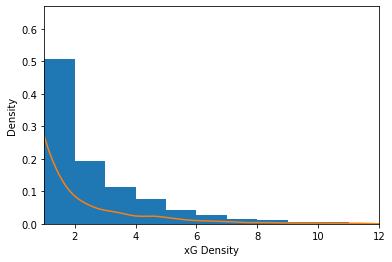

In [88]:
ax = players['xG'].plot.hist(density=True, xlim=[1,12], bins=range(1,12))
players['xG'].plot.density(ax=ax)
ax.set_xlabel('xG Density')

#### Goal and xG Density for players with over 10 goals

Text(0.5, 0, 'Gls Density')

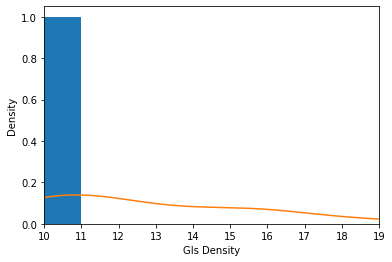

In [91]:
ax = scorers_with_10_goals['Gls'].plot.hist(density=True, xlim=[10,19], bins=range(1,12))
scorers_with_10_goals['Gls'].plot.density(ax=ax)
ax.set_xlabel('Gls Density')

Text(0.5, 0, 'xG Density')

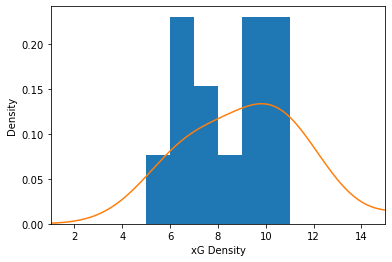

In [93]:
ax = scorers_with_10_goals['xG'].plot.hist(density=True, xlim=[1,15], bins=range(1,12))
scorers_with_10_goals['xG'].plot.density(ax=ax)
ax.set_xlabel('xG Density')

## EXPLORING BINARY AND CATEGORICAL DATA

### CORRELATION

PLAYERS CORRELATION HEATMAP

<AxesSubplot:>

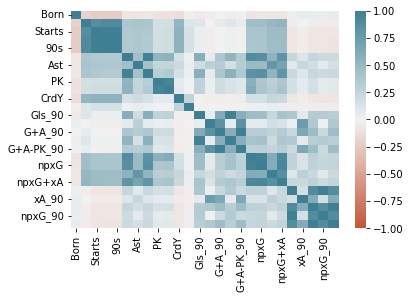

In [97]:
sns.heatmap(players.corr(), vmin=-1, vmax=1,
cmap=sns.diverging_palette(20, 220, as_cmap=True))

PLAYERS WITH OVER TEN GOALS CORRELATION HEATMAP

<AxesSubplot:>

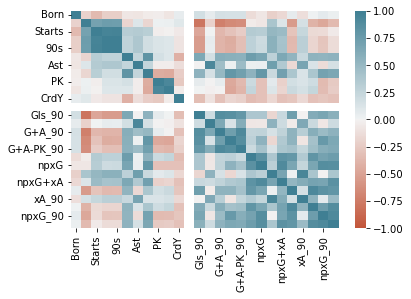

In [96]:
sns.heatmap(scorers_with_10_goals.corr(), vmin=-1, vmax=1,
cmap=sns.diverging_palette(20, 220, as_cmap=True))

#### SCATTERPLOTS

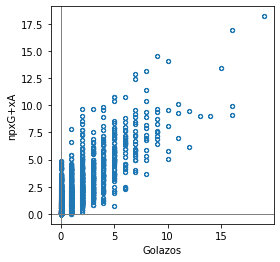

In [99]:
ax = players.plot.scatter(x='Gls', y='npxG+xA', figsize=(4, 4), marker='$\u25EF$')
ax.set_xlabel('Golazos')
ax.set_ylabel('npxG+xA')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

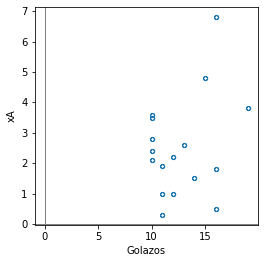

In [100]:
ax = scorers_with_10_goals.plot.scatter(x='Gls', y='xA', figsize=(4, 4), marker='$\u25EF$')
ax.set_xlabel('Golazos')
ax.set_ylabel('xA')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

### Exploring two or more variables (MULTIVARIATE ANALYSIS)

#### Hexagonal Binning and Contours